In [1]:
import pandas as pd 

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import seaborn as sns

In [4]:
data = pd.read_csv("mortality_data.csv")

In [5]:
data.head()

,Unnamed: 0,SCOPE,LOCAL_CODE,LOCAL_NAME,LOCAL_LATITUDE,LOCAL_LONGITUDE,YEAR,POPULATION,POPULATION_BIRTH,MHDI,...,NU_DEATH_CAREPREV_CHILD,NU_DEATH_DTPREV,NU_DEATH_PROMOPREV,NU_DEATH_PNEUMONIA,MORTALITY_IID,MORTALITY_MALNUTRITION,MORTALITY_COVID19,MORTALITY_COVID19B,FL1_OUT,FL2_OUT
0,1,7,110001,Alta Floresta D'Oeste,-12.46967,-62.274475,1996,33471.0,778,0.329,...,1,2,1,0,1.285347,0.000000,0.0,0.0,0,0
1,2,7,110001,Alta Floresta D'Oeste,-12.46967,-62.274475,1997,25009.0,587,0.329,...,3,1,1,0,0.000000,1.703578,0.0,0.0,0,0
2,3,7,110001,Alta Floresta D'Oeste,-12.46967,-62.274475,1998,24793.0,591,0.329,...,5,3,2,2,3.384095,0.000000,0.0,0.0,0,0
3,4,7,110001,Alta Floresta D'Oeste,-12.46967,-62.274475,1999,25025.0,689,0.329,...,9,6,1,2,1.451379,0.000000,0.0,0.0,0,0
4,5,7,110001,Alta Floresta D'Oeste,-12.46967,-62.274475,2000,26533.0,617,0.483,...,2,2,0,0,0.000000,0.000000,0.0,0.0,0,0


In [6]:
data= data.drop(['Unnamed: 0'], axis=1)
data_clean = data[data.FL1_OUT != 1]

In [7]:
# 5297 Municipios 

len(data_clean.LOCAL_NAME.unique()) 

5297

In [8]:
# 36 colunas 
data_clean.columns

Index(['SCOPE', 'LOCAL_CODE', 'LOCAL_NAME', 'LOCAL_LATITUDE',
       'LOCAL_LONGITUDE', 'YEAR', 'POPULATION', 'POPULATION_BIRTH', 'MHDI',
       'MHDI_E', 'MHDI_L', 'MHDI_I', 'GINI', 'GDP', 'GDP_PC', 'SANITATION',
       'BIRTH_RATE', 'AGE', 'NU_DEATH_ALL', 'NU_DEATH_AVOIDABLE',
       'NU_DEATH_ILLDEFINED', 'NU_DEATH_OTHERS', 'NU_DEATH_IMMUNOPREV',
       'NU_DEATH_CAREPREV_ALL', 'NU_DEATH_CAREPREV_PREG',
       'NU_DEATH_CAREPREV_DELIV', 'NU_DEATH_CAREPREV_CHILD', 'NU_DEATH_DTPREV',
       'NU_DEATH_PROMOPREV', 'NU_DEATH_PNEUMONIA', 'MORTALITY_IID',
       'MORTALITY_MALNUTRITION', 'MORTALITY_COVID19', 'MORTALITY_COVID19B',
       'FL1_OUT', 'FL2_OUT'],
      dtype='object')

In [9]:
# criar o dataset de 2021 para remover duplicidade do tamanho das cidades
data_2021 = data_clean[data_clean.YEAR == 2021]
data_2010 = data_clean[data_clean.YEAR == 2010]

<AxesSubplot:ylabel='POPULATION'>

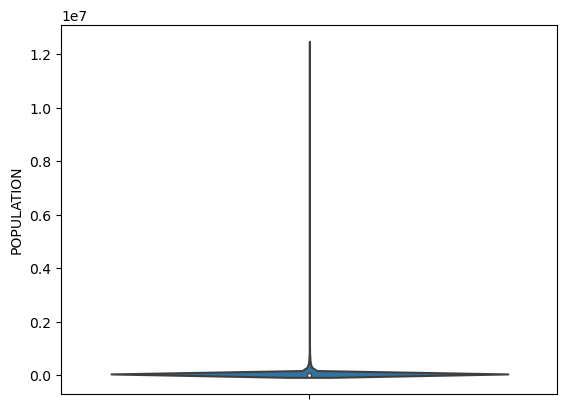

In [10]:
sns.violinplot(y=data_2021['POPULATION'])

In [11]:
data_2021[['POPULATION','POPULATION_BIRTH']].describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,POPULATION,POPULATION_BIRTH
count,5.570000e+03,5570.000000
mean,3.829760e+04,466.813824
std,2.242882e+05,2460.551893
min,7.710000e+02,5.000000
1%,1.627070e+03,14.000000
10%,3.190300e+03,32.000000
20%,4.663800e+03,51.000000
30%,6.372400e+03,71.000000
40%,8.593200e+03,96.000000
50%,1.173200e+04,135.000000


In [12]:
data_2010[['POPULATION','POPULATION_BIRTH']].describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,POPULATION,POPULATION_BIRTH
count,5.565000e+03,5565.000000
mean,3.427362e+04,514.248158
std,2.029968e+05,3067.382739
min,8.050000e+02,3.000000
1%,1.723280e+03,14.000000
10%,3.169000e+03,35.000000
20%,4.527400e+03,55.000000
30%,6.110600e+03,78.000000
40%,8.166800e+03,108.000000
50%,1.093300e+04,150.000000


In [13]:
# cidades que foram criadas entre 2021 e 2010

In [14]:
lista_new_cities = list(set(data_2021['LOCAL_NAME'].unique()) - set(data_2010['LOCAL_NAME'].unique()))
print(lista_new_cities) 

['Pescaria Brava', 'Pinto Bandeira', 'Paraíso das Águas', 'Mojuí dos Campos', 'Balneário Rincão']


In [15]:
data_2021[data_2021['LOCAL_NAME'].isin(lista_new_cities)]

,SCOPE,LOCAL_CODE,LOCAL_NAME,LOCAL_LATITUDE,LOCAL_LONGITUDE,YEAR,POPULATION,POPULATION_BIRTH,MHDI,MHDI_E,...,NU_DEATH_CAREPREV_CHILD,NU_DEATH_DTPREV,NU_DEATH_PROMOPREV,NU_DEATH_PNEUMONIA,MORTALITY_IID,MORTALITY_MALNUTRITION,MORTALITY_COVID19,MORTALITY_COVID19B,FL1_OUT,FL2_OUT
5676,7,150475,Mojuí dos Campos,-3.070409,-54.575156,2021,16282.0,285,NaN,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0
115979,7,421265,Pescaria Brava,-28.401761,-48.883641,2021,10225.0,89,NaN,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0,1
118606,7,422000,Balneário Rincão,-28.826737,-49.254223,2021,13129.0,225,NaN,NaN,...,1,0,0,0,0.0,0.0,0.0,0.0,0,0
126723,7,431454,Pinto Bandeira,-29.092932,-51.461690,2021,3068.0,20,NaN,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0,1
132759,7,500627,Paraíso das Águas,-19.228131,-53.130323,2021,5751.0,62,NaN,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0,1


### Note: De 2021 para 2010 perdemos 5 cidades

## Relaçao temporal

In [16]:
data_agg = data_clean[['YEAR', 'POPULATION_BIRTH', 'POPULATION']].groupby('YEAR').agg('sum')
data_agg

,POPULATION_BIRTH,POPULATION
YEAR,,
1996,2837952,157070163.0
1997,2921907,159636413.0
1998,3047214,161790311.0
1999,3253951,163947554.0
2000,3204937,169799170.0
2001,3114203,172385826.0
2002,3058697,174632960.0
2003,3037367,176871437.0
2004,3026131,181581024.0


<AxesSubplot:xlabel='YEAR', ylabel='POPULATION'>

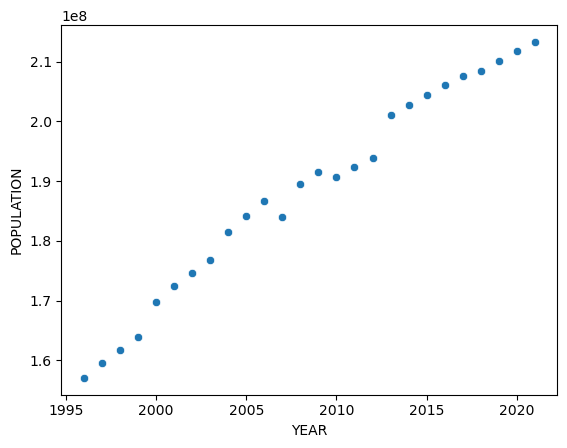

In [17]:
# A populacao esta crescendo 
sns.scatterplot(data=data_agg, x="YEAR", y="POPULATION")

<AxesSubplot:xlabel='YEAR', ylabel='POPULATION'>

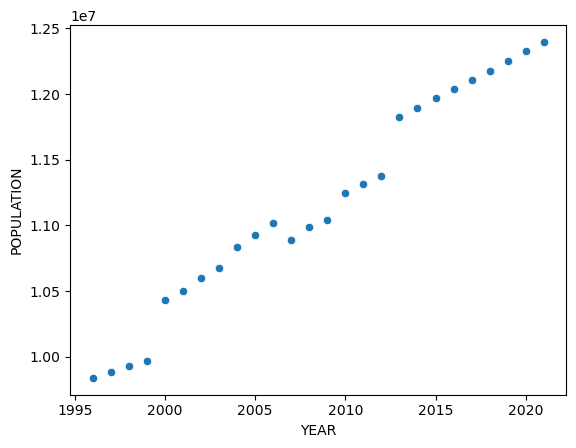

In [18]:
# A populacao esta crescendo 
sns.scatterplot(data=data_clean[data_clean['LOCAL_NAME']=='São Paulo'], x="YEAR", y="POPULATION")

<AxesSubplot:xlabel='YEAR', ylabel='POPULATION'>

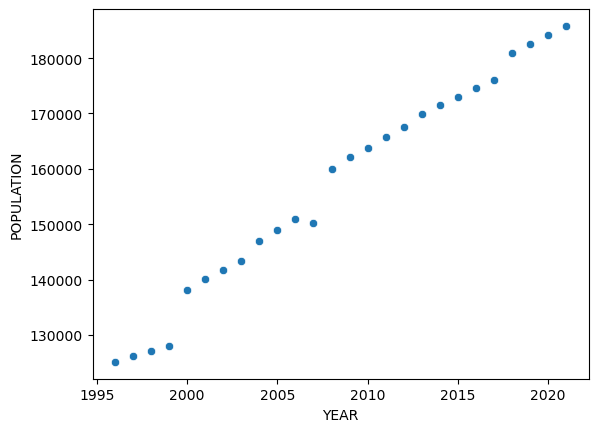

In [19]:
# A populacao esta crescendo - As cidades menores tem o mesmo comportamento, mas em escala menor
sns.scatterplot(data=data_clean[data_clean['LOCAL_NAME']=='Teresópolis'], x="YEAR", y="POPULATION")

<AxesSubplot:xlabel='YEAR', ylabel='POPULATION_BIRTH'>

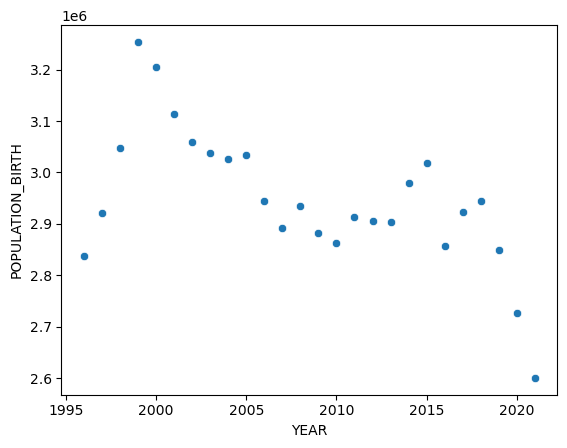

In [20]:
# O número de nascimentos esta caindo no Brasil
sns.scatterplot(data=data_agg, x="YEAR", y="POPULATION_BIRTH")

<AxesSubplot:xlabel='YEAR', ylabel='POPULATION_BIRTH'>

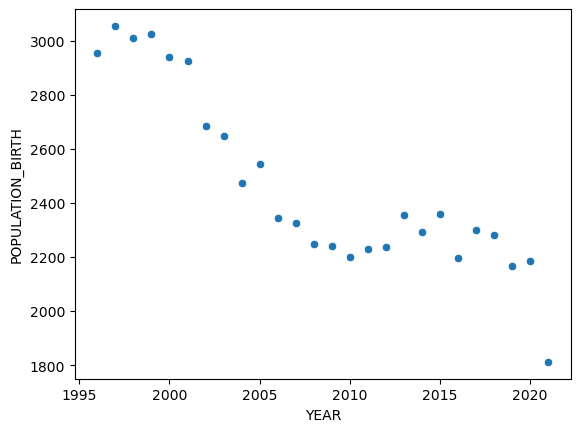

In [21]:
# A populacao esta crescendo - As cidades menores tem o mesmo comportamento, mas em ordem de grandeza diferente
sns.scatterplot(data=data_clean[data_clean['LOCAL_NAME']=='Teresópolis'], x="YEAR", y="POPULATION_BIRTH")

### Note: As cidades tem comportamentos temporais, mas em escalas de grandeza diferentes

In [22]:
data_2021[['POPULATION','POPULATION_BIRTH']].describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,POPULATION,POPULATION_BIRTH
count,5.570000e+03,5570.000000
mean,3.829760e+04,466.813824
std,2.242882e+05,2460.551893
min,7.710000e+02,5.000000
1%,1.627070e+03,14.000000
10%,3.190300e+03,32.000000
20%,4.663800e+03,51.000000
30%,6.372400e+03,71.000000
40%,8.593200e+03,96.000000
50%,1.173200e+04,135.000000


## Abordagem 1 para separar as cidades de tamanho


Usando dados do IBGE  
- até 50 mil é rural ou pequeno porte
- entre 50 mil e 100 mil é grande porte
- até 100 mil é grande porte

In [23]:
ibge_grupo1 = data_2021[data_2021['POPULATION']< 50000]
ibge_grupo2 = data_2021[(data_2021['POPULATION']>= 50000) &  (data_2021['POPULATION']< 100000)]
ibge_grupo3 = data_2021[data_2021['POPULATION']>= 100000]

Numero de cidades 4669


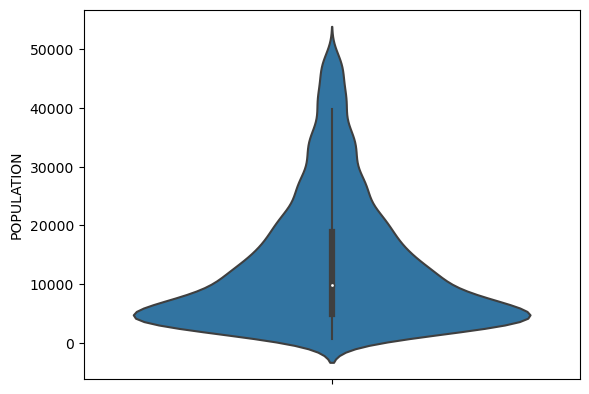

In [24]:
sns.violinplot(y=ibge_grupo1['POPULATION'])
print(f"Numero de cidades {len(ibge_grupo1.LOCAL_NAME.unique())}")

Note: Esse grupo 1 provavelmente teria que ser dividido posteriormente, pois ele tem 88% das cidades

Numero de cidades 352


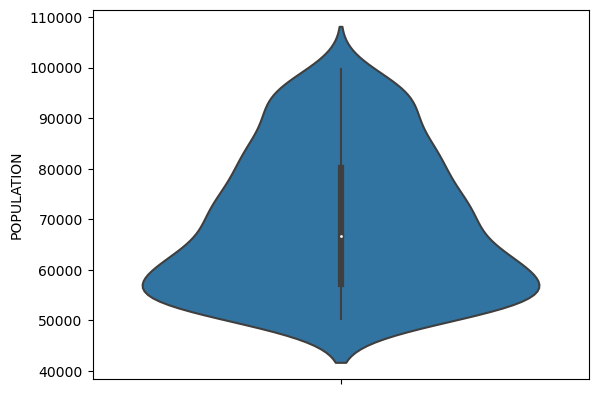

In [25]:
sns.violinplot(y=ibge_grupo2['POPULATION'])
print(f"Numero de cidades {len(ibge_grupo2.LOCAL_NAME.unique())}")

Numero de cidades 326


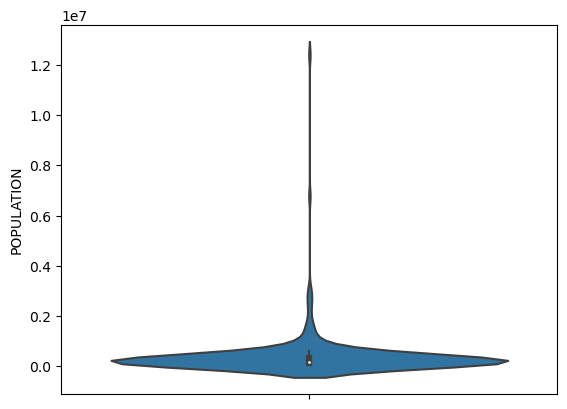

In [26]:
sns.violinplot(y=ibge_grupo3['POPULATION'])
print(f"Numero de cidades {len(ibge_grupo3.LOCAL_NAME.unique())}")

## Abordagem 2 para separar as cidades de tamanho

# Baseado no artigo resumido em:  http://www.projectglobalawakening.com/order-of-magnitude/ 
 - Usamos o valor do log para o agrupamento 
 - A cada um ou dois numeros a mais, é um novo grupo

## 2021 - Old Version

In [27]:
data_2021['log_POPULATION'] = np.log10(data_2021['POPULATION'])

/Users/jessica.souza2/miniforge3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
describe_log_2021 = data_2021[['POPULATION', 'log_POPULATION']].describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])
describe_log_2021

,POPULATION,log_POPULATION
count,5.570000e+03,5570.000000
mean,3.829760e+04,4.117034
std,2.242882e+05,0.516932
min,7.710000e+02,2.887054
1%,1.627070e+03,3.211406
10%,3.190300e+03,3.503831
20%,4.663800e+03,3.668740
30%,6.372400e+03,3.804303
40%,8.593200e+03,3.934155
50%,1.173200e+04,4.069372


In [29]:
grupo_1_2021 = data_2021[data_2021['log_POPULATION'] < describe_log_2021.log_POPULATION.loc['min']+1 ]
grupo_2_2021 = data_2021[(data_2021['log_POPULATION']>= describe_log_2021.log_POPULATION.loc['min']+1) & (data_2021['log_POPULATION']< describe_log_2021.log_POPULATION.loc['min']+2) ]

In [30]:

grupo_3_2021 = data_2021[(data_2021['log_POPULATION']>= describe_log_2021.log_POPULATION.loc['min']+2) & (data_2021['log_POPULATION']< describe_log_2021.log_POPULATION.loc['min']+3)]
grupo_4_2021 = data_2021[(data_2021['log_POPULATION']>= describe_log_2021.log_POPULATION.loc['min']+3)]

Numero de cidades 2010


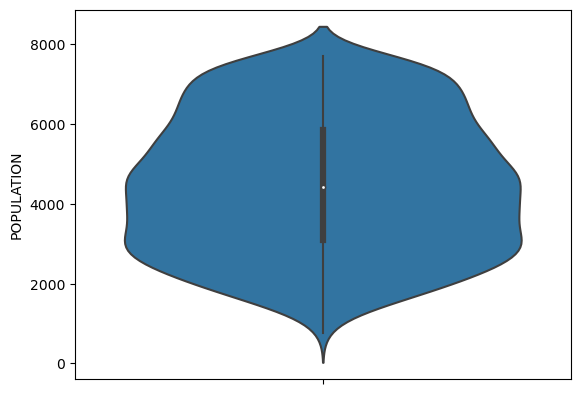

In [31]:
sns.violinplot(y=grupo_1_2021['POPULATION'])
print(f"Numero de cidades {len(grupo_1_2021.LOCAL_NAME.unique())}")

Numero de cidades 3003


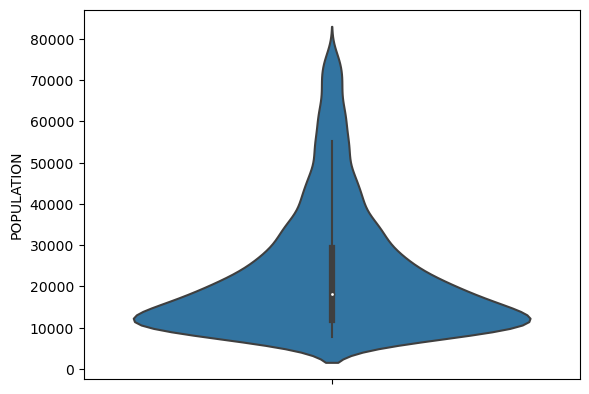

In [32]:
sns.violinplot(y=grupo_2_2021['POPULATION'])
print(f"Numero de cidades {len(grupo_2_2021.LOCAL_NAME.unique())}")


Numero de cidades 406


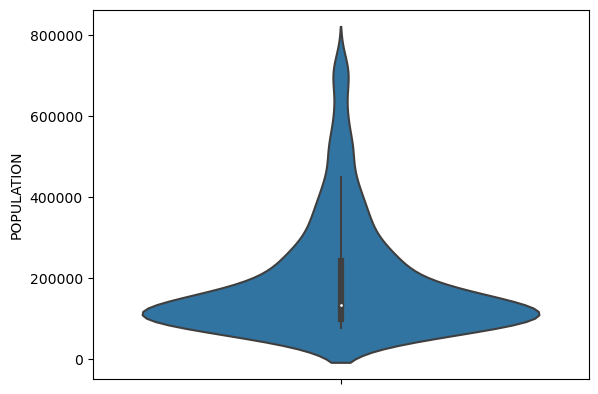

In [33]:
sns.violinplot(y=grupo_3_2021['POPULATION'])
print(f"Numero de cidades {len(grupo_3_2021.LOCAL_NAME.unique())}")

Numero de cidades 24


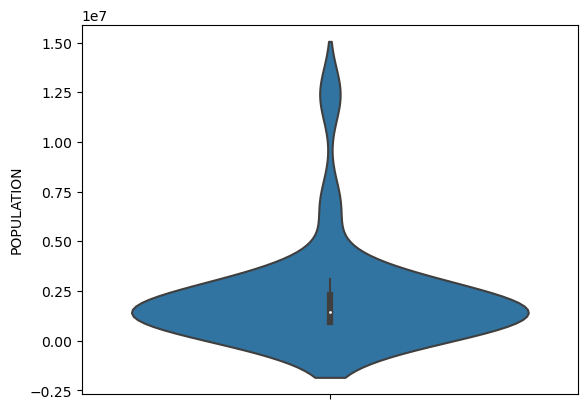

In [34]:
sns.violinplot(y=grupo_4_2021['POPULATION'])
print(f"Numero de cidades {len(grupo_4_2021.LOCAL_NAME.unique())}")

In [35]:
grupo_4_2021.LOCAL_NAME.unique()

array(['Duque de Caxias', 'Nova Iguaçu', 'São Gonçalo', 'Campinas',
       'Guarulhos', 'São Bernardo do Campo', 'Manaus', 'Belém',
       'São Luís', 'Teresina', 'Fortaleza', 'Natal', 'João Pessoa',
       'Recife', 'Maceió', 'Salvador', 'Belo Horizonte', 'Rio de Janeiro',
       'São Paulo', 'Curitiba', 'Porto Alegre', 'Campo Grande', 'Goiânia',
       'Brasília'], dtype=object)

## 2010 - Ano Censo 

In [36]:
data_2010['log_POPULATION'] = np.log10(data_2010['POPULATION'])
describe_log = data_2010[['POPULATION', 'log_POPULATION']].describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

/Users/jessica.souza2/miniforge3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
grupo_1_2010 = data_2010[data_2010['log_POPULATION'] < describe_log.log_POPULATION.loc['min']+1 ]
grupo_2_2010 = data_2010[(data_2010['log_POPULATION']>= describe_log.log_POPULATION.loc['min']+1) & (data_2010['log_POPULATION']< describe_log.log_POPULATION.loc['min']+2) ]
grupo_3_2010 = data_2010[(data_2010['log_POPULATION']>= describe_log.log_POPULATION.loc['min']+2) & (data_2010['log_POPULATION']< describe_log.log_POPULATION.loc['min']+3)]
grupo_4_2010 = data_2010[(data_2010['log_POPULATION']>= describe_log.log_POPULATION.loc['min']+3)]

In [38]:
describe_log

,POPULATION,log_POPULATION
count,5.565000e+03,5565.000000
mean,3.427362e+04,4.089101
std,2.029968e+05,0.499713
min,8.050000e+02,2.905796
1%,1.723280e+03,3.236356
10%,3.169000e+03,3.500922
20%,4.527400e+03,3.655849
30%,6.110600e+03,3.786084
40%,8.166800e+03,3.912052
50%,1.093300e+04,4.038739


Numero de cidades em 2010: 2166
extra - Numero de cidades em 2021: 2010
Esse grupo representa: 39.51 % da cidades
Esse grupo representa: 5.31% da População de 2010
Cidades com FL2 diferente de 0: 49.25%
Cidades com FL2 igual a 1: 49.25%
Cidades com FL2 igual a 2: 0.00%
Cidades com FL2 igual a 3: 0.00%
A maior cidade tem 8047.0 Habitantes
A Menor cidade tem 805.0 Habitantes
Todas as cidades são de Pequeno porte


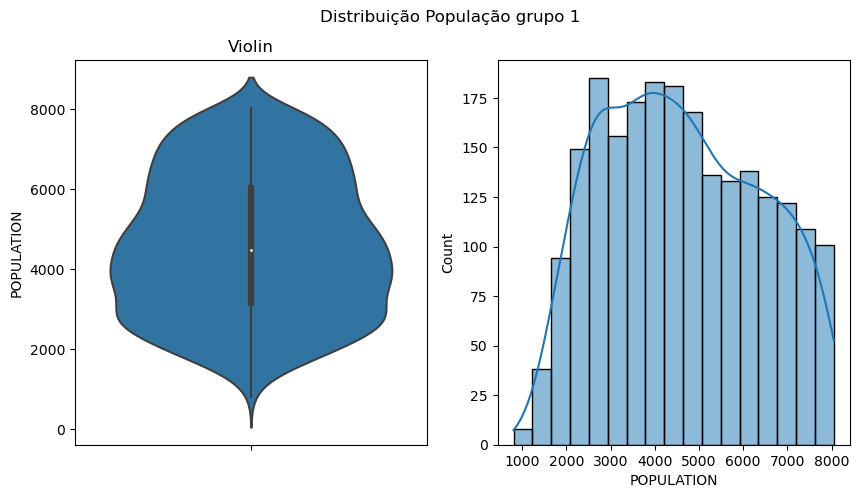

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Distribuição População grupo 1')
sns.violinplot(ax=axes[0], y=grupo_1_2010['POPULATION'])
axes[0].set_title("Violin")
sns.histplot(ax=axes[1], data=grupo_1_2010, x="POPULATION", kde=True)
print(f"Numero de cidades em 2010: {len(grupo_1_2010.LOCAL_NAME.unique())}")
print(f"extra - Numero de cidades em 2021: {len(grupo_1_2021.LOCAL_NAME.unique())}")
print(f"Esse grupo representa: {(100 * grupo_1_2010.shape[0]/ data_2010.shape[0]):.2f} % da cidades")
print(f"Esse grupo representa: {(grupo_1_2010['POPULATION'].sum()/ data_2010['POPULATION'].sum()*100):.2f}% da População de 2010")
print(f"Cidades com FL2 diferente de 0: {(100* grupo_1_2010[grupo_1_2010.FL2_OUT != 0].shape[0]/grupo_1_2010.shape[0]):.2f}%")
print(f"Cidades com FL2 igual a 1: {(100* grupo_1_2010[grupo_1_2010.FL2_OUT == 1].shape[0]/grupo_1_2010.shape[0]):.2f}%")
print(f"Cidades com FL2 igual a 2: {(100* grupo_1_2010[grupo_1_2010.FL2_OUT == 2].shape[0]/grupo_1_2010.shape[0]):.2f}%")
print(f"Cidades com FL2 igual a 3: {(100* grupo_1_2010[grupo_1_2010.FL2_OUT == 3].shape[0]/grupo_1_2010.shape[0]):.2f}%")

print(f"A maior cidade tem {grupo_1_2010['POPULATION'].max()} Habitantes")
print(f"A Menor cidade tem {grupo_1_2010['POPULATION'].min()} Habitantes")
print(f"Todas as cidades são de Pequeno porte")

In [40]:
print(f"Cidades com FL2 diferente de 0: {(100* grupo_1_2021[grupo_1_2021.FL2_OUT != 0].shape[0]/grupo_1_2021.shape[0]):.2f}%")


Cidades com FL2 diferente de 0: 58.96%


In [41]:
len(data_clean[data_clean.FL2_OUT != 0].LOCAL_CODE.unique())

3927

Numero de cidades em 2010: 2909
extra - Numero de cidades em 2021: 3003
Esse grupo representa: 54.07 % da cidades
Esse grupo representa: 36.51% da População de 2010
Cidades com FL2 diferente de 0: 7.31%
Cidades com FL2 igual a 1: 7.31%
Cidades com FL2 igual a 2: 0.00%
Cidades com FL2 igual a 3: 0.00%
A maior cidade tem 79635.0 Habitantes
A Menor cidade tem 8054.0 Habitantes
91.69 % das cidades são consideradas pequeno porte pelo IBGE
8.31 % das cidades são consideradas Médio porte pelo IBGE


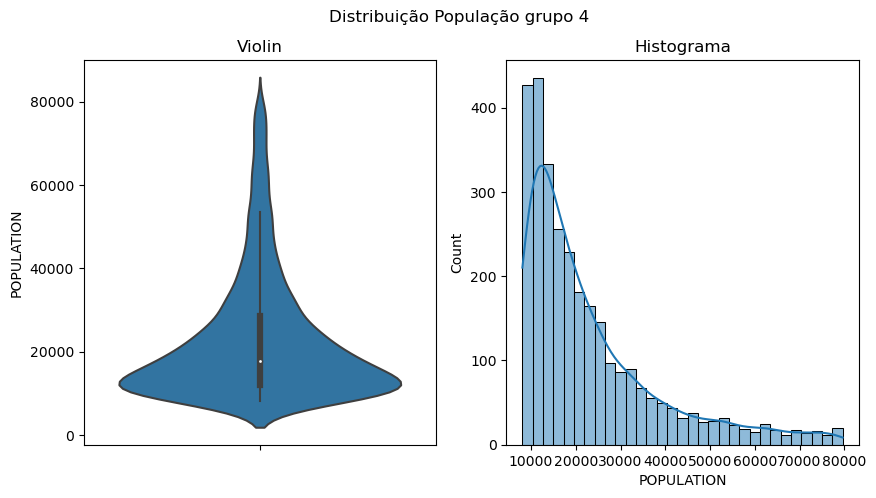

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Distribuição População grupo 4')
sns.violinplot(ax=axes[0], y=grupo_2_2010['POPULATION'])
axes[0].set_title("Violin")
sns.histplot(ax=axes[1], data=grupo_2_2010, x="POPULATION", kde=True)
axes[1].set_title("Histograma")
print(f"Numero de cidades em 2010: {len(grupo_2_2010.LOCAL_NAME.unique())}")
print(f"extra - Numero de cidades em 2021: {len(grupo_2_2021.LOCAL_NAME.unique())}")
print(f"Esse grupo representa: {(100 * grupo_2_2010.shape[0]/ data_2010.shape[0]):.2f} % da cidades")
print(f"Esse grupo representa: {(grupo_2_2010['POPULATION'].sum()/ data_2010['POPULATION'].sum()*100):.2f}% da População de 2010")
print(f"Cidades com FL2 diferente de 0: {(100* grupo_2_2010[grupo_2_2010.FL2_OUT != 0].shape[0]/grupo_2_2010.shape[0]):.2f}%")
print(f"Cidades com FL2 igual a 1: {(100* grupo_2_2010[grupo_2_2010.FL2_OUT == 1].shape[0]/grupo_2_2010.shape[0]):.2f}%")
print(f"Cidades com FL2 igual a 2: {(100* grupo_2_2010[grupo_2_2010.FL2_OUT == 2].shape[0]/grupo_2_2010.shape[0]):.2f}%")
print(f"Cidades com FL2 igual a 3: {(100* grupo_2_2010[grupo_2_2010.FL2_OUT == 3].shape[0]/grupo_2_2010.shape[0]):.2f}%")
print(f"A maior cidade tem {grupo_2_2010['POPULATION'].max()} Habitantes")
print(f"A Menor cidade tem {grupo_2_2010['POPULATION'].min()} Habitantes")
print(f"{100*grupo_2_2010[grupo_2_2010['POPULATION']<50000].shape[0]/grupo_2_2010.shape[0]:.2f} % das cidades são consideradas pequeno porte pelo IBGE")
print(f"{100*grupo_2_2010[grupo_2_2010['POPULATION']>=50000].shape[0]/grupo_2_2010.shape[0]:.2f} % das cidades são consideradas Médio porte pelo IBGE")

Numero de cidades em 2010: 338
extra - Numero de cidades em 2021: 406
Esse grupo representa: 6.07 % da cidades
Esse grupo representa: 35.24% da População de 2010
Cidades com FL2 diferente de 0: 0.00%
A maior cidade tem 803811.0 Habitantes
A Menor cidade tem 80542.0 Habitantes
21.89 % das cidades são consideradas Médio porte pelo IBGE
78.11 % das cidades são consideradas Grande porte pelo IBGE


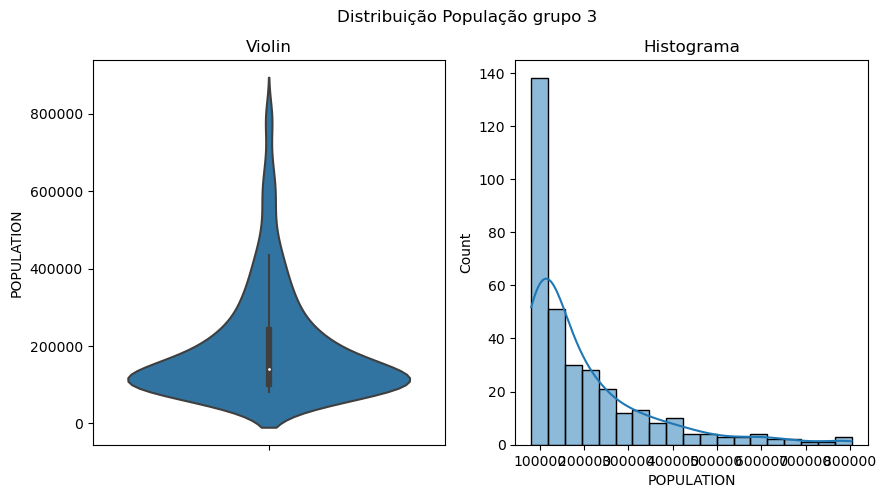

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Distribuição População grupo 3')
sns.violinplot(ax=axes[0], y=grupo_3_2010['POPULATION'])
axes[0].set_title("Violin")
sns.histplot(ax=axes[1], data=grupo_3_2010, x="POPULATION", kde=True)
axes[1].set_title("Histograma")
print(f"Numero de cidades em 2010: {len(grupo_3_2010.LOCAL_NAME.unique())}")
print(f"extra - Numero de cidades em 2021: {len(grupo_3_2021.LOCAL_NAME.unique())}")
print(f"Esse grupo representa: {(100 * grupo_3_2010.shape[0]/ data_2010.shape[0]):.2f} % da cidades")
print(f"Esse grupo representa: {(grupo_3_2010['POPULATION'].sum()/ data_2010['POPULATION'].sum()*100):.2f}% da População de 2010")
print(f"Cidades com FL2 diferente de 0: {(100* grupo_3_2010[grupo_3_2010.FL2_OUT != 0].shape[0]/grupo_3_2010.shape[0]):.2f}%")
print(f"A maior cidade tem {grupo_3_2010['POPULATION'].max()} Habitantes")
print(f"A Menor cidade tem {grupo_3_2010['POPULATION'].min()} Habitantes")
print(f"{100*grupo_3_2010[grupo_3_2010['POPULATION']<100000].shape[0]/grupo_3_2010.shape[0]:.2f} % das cidades são consideradas Médio porte pelo IBGE")
print(f"{100*grupo_3_2010[grupo_3_2010['POPULATION']>=100000].shape[0]/grupo_3_2010.shape[0]:.2f} % das cidades são consideradas Grande porte pelo IBGE")

Numero de cidades em 2010: 19
extra - Numero de cidades em 2021: 24
Esse grupo representa: 0.34 % da cidades
Esse grupo representa: 22.93% da População de 2010
Cidades com FL2 diferente de 0: 0.00%
A maior cidade tem 11244369.0 Habitantes
A Menor cidade tem 814439.0 Habitantes
Todas as cidades são de grande porte


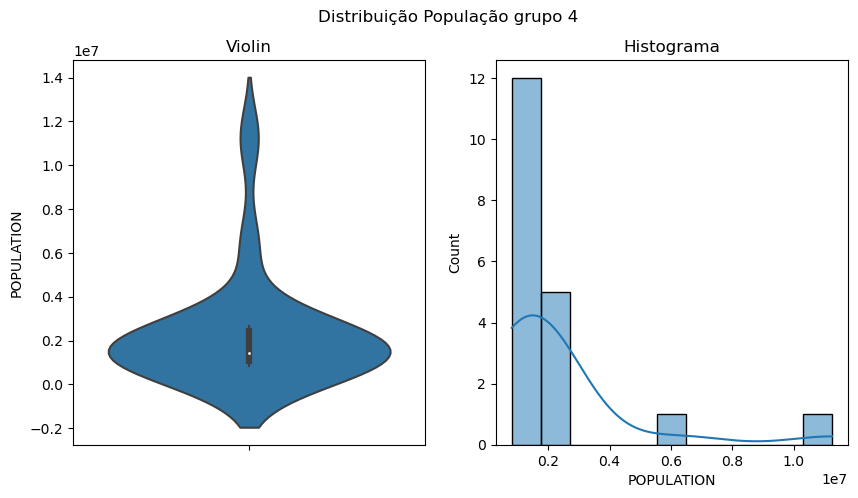

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Distribuição População grupo 4')
sns.violinplot(ax=axes[0], y=grupo_4_2010['POPULATION'])
axes[0].set_title("Violin")
sns.histplot(ax=axes[1], data=grupo_4_2010, x="POPULATION", kde=True)
axes[1].set_title("Histograma")

print(f"Numero de cidades em 2010: {len(grupo_4_2010.LOCAL_NAME.unique())}")
print(f"extra - Numero de cidades em 2021: {len(grupo_4_2021.LOCAL_NAME.unique())}")
print(f"Esse grupo representa: {(100 * grupo_4_2010.shape[0]/ data_2010.shape[0]):.2f} % da cidades")
print(f"Esse grupo representa: {(grupo_4_2010['POPULATION'].sum()/ data_2010['POPULATION'].sum()*100):.2f}% da População de 2010")
print(f"Cidades com FL2 diferente de 0: {(100* grupo_4_2010[grupo_4_2010.FL2_OUT != 0].shape[0]/grupo_4_2010.shape[0]):.2f}%")
print(f"A maior cidade tem {grupo_4_2010['POPULATION'].max()} Habitantes")
print(f"A Menor cidade tem {grupo_4_2010['POPULATION'].min()} Habitantes")
print(f"Todas as cidades são de grande porte")

In [46]:
# Cidades que estão em 2021 e não estao em 2010 no grupo 4

In [47]:
lista_new_cities_grupo_4 = list(set(grupo_4_2021['LOCAL_NAME'].unique()) - set(grupo_4_2010['LOCAL_NAME'].unique()))
lista_new_cities_grupo_4

['João Pessoa',
 'Campo Grande',
 'Nova Iguaçu',
 'São Bernardo do Campo',
 'Natal']

In [48]:
data_clean[(data_clean.FL2_OUT==3) & (data_clean.YEAR==2010)]

,SCOPE,LOCAL_CODE,LOCAL_NAME,LOCAL_LATITUDE,LOCAL_LONGITUDE,YEAR,POPULATION,POPULATION_BIRTH,MHDI,MHDI_E,...,NU_DEATH_CAREPREV_CHILD,NU_DEATH_DTPREV,NU_DEATH_PROMOPREV,NU_DEATH_PNEUMONIA,MORTALITY_IID,MORTALITY_MALNUTRITION,MORTALITY_COVID19,MORTALITY_COVID19B,FL1_OUT,FL2_OUT


In [49]:
data={'N de cidades':[len(grupo_1_2010.LOCAL_NAME.unique()), len(grupo_2_2010.LOCAL_NAME.unique()), len(grupo_3_2010.LOCAL_NAME.unique()), len(grupo_4_2010.LOCAL_NAME.unique())],
      '% do total de cidades':[(100 * grupo_1_2010.shape[0]/ data_2010.shape[0]), (100 * grupo_2_2010.shape[0]/ data_2010.shape[0]), (100 * grupo_3_2010.shape[0]/ data_2010.shape[0]), (100 * grupo_4_2010.shape[0]/ data_2010.shape[0])],
      '% do total da População':[(grupo_1_2010['POPULATION'].sum()/ data_2010['POPULATION'].sum()*100), (grupo_2_2010['POPULATION'].sum()/ data_2010['POPULATION'].sum()*100),(grupo_3_2010['POPULATION'].sum()/ data_2010['POPULATION'].sum()*100),(grupo_4_2010['POPULATION'].sum()/ data_2010['POPULATION'].sum()*100)],
      '% com FL2 != 0':[(100* grupo_1_2010[grupo_1_2010.FL2_OUT != 0].shape[0]/grupo_1_2010.shape[0]), (100* grupo_2_2010[grupo_2_2010.FL2_OUT != 0].shape[0]/grupo_2_2010.shape[0]), (100* grupo_3_2010[grupo_3_2010.FL2_OUT != 0].shape[0]/grupo_3_2010.shape[0]), (100* grupo_4_2010[grupo_4_2010.FL2_OUT != 0].shape[0]/grupo_4_2010.shape[0])],
      'População max':[grupo_1_2010['POPULATION'].max(), grupo_2_2010['POPULATION'].max(), grupo_3_2010['POPULATION'].max(), grupo_4_2010['POPULATION'].max()] ,
      'População min':[grupo_1_2010['POPULATION'].min(), grupo_2_2010['POPULATION'].min(), grupo_3_2010['POPULATION'].min(), grupo_4_2010['POPULATION'].min()] ,
      '% em Pequeno porte':[100, 100*grupo_2_2010[grupo_2_2010['POPULATION']<50000].shape[0]/grupo_2_2010.shape[0], 0 ,0],
      '% em Médio porte':[0, grupo_2_2010[grupo_2_2010['POPULATION']>=50000].shape[0]/grupo_2_2010.shape[0],100*grupo_3_2010[grupo_3_2010['POPULATION']<100000].shape[0]/grupo_3_2010.shape[0],0],
      '% em Grande porte':[0,0,100*grupo_3_2010[grupo_3_2010['POPULATION']>=100000].shape[0]/grupo_3_2010.shape[0],100]
     }

df_sumary =pd.DataFrame(data,index=["grupo_1", "grupo_2", "grupo_3", "grupo_4"])
df_sumary

,N de cidades,% do total de cidades,% do total da População,% com FL2 != 0,População max,População min,% em Pequeno porte,% em Médio porte,% em Grande porte
grupo_1,2166,39.514825,5.314844,49.249659,8047.0,805.0,100.000000,0.000000,0.000000
grupo_2,2909,54.070081,36.511116,7.311399,79635.0,8054.0,91.691592,0.083084,0.000000
grupo_3,338,6.073675,35.242817,0.000000,803811.0,80542.0,0.000000,21.893491,78.106509
grupo_4,19,0.341420,22.931222,0.000000,11244369.0,814439.0,0.000000,0.000000,100.000000


Text(0.5, 1.0, 'Grupo 4')

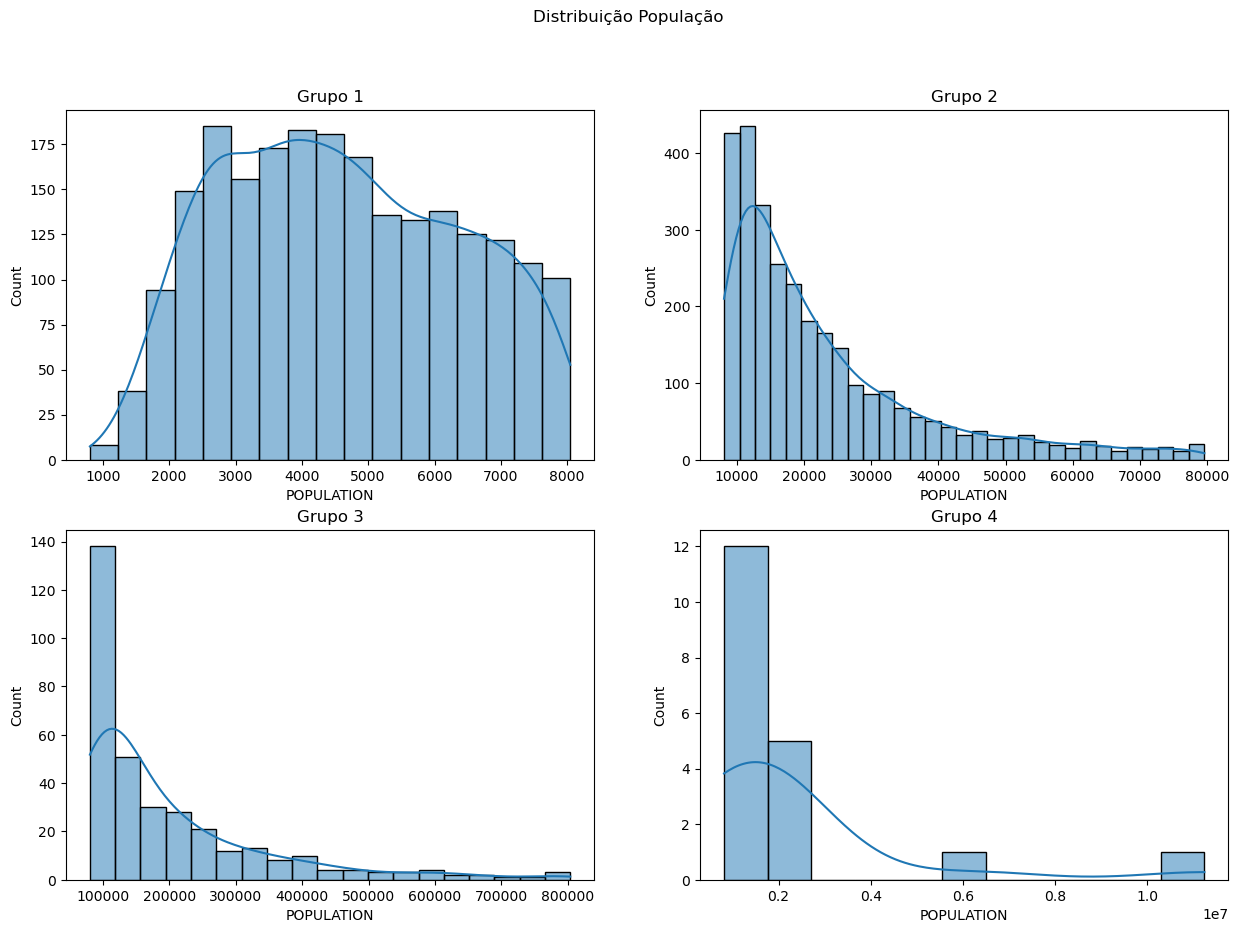

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribuição População')
sns.histplot(ax=axes[0, 0], data=grupo_1_2010, x="POPULATION", kde=True)
axes[0, 0].set_title("Grupo 1")
sns.histplot(ax=axes[0, 1], data=grupo_2_2010, x="POPULATION", kde=True)
axes[0, 1].set_title("Grupo 2")
sns.histplot(ax=axes[1, 0], data=grupo_3_2010, x="POPULATION", kde=True)
axes[1, 0].set_title("Grupo 3")
sns.histplot(ax=axes[1, 1], data=grupo_4_2010, x="POPULATION", kde=True)
axes[1, 1].set_title("Grupo 4")

### Extra: análise se alguma variavel pelos grupos

Text(0.5, 1.0, 'Grupo 4')

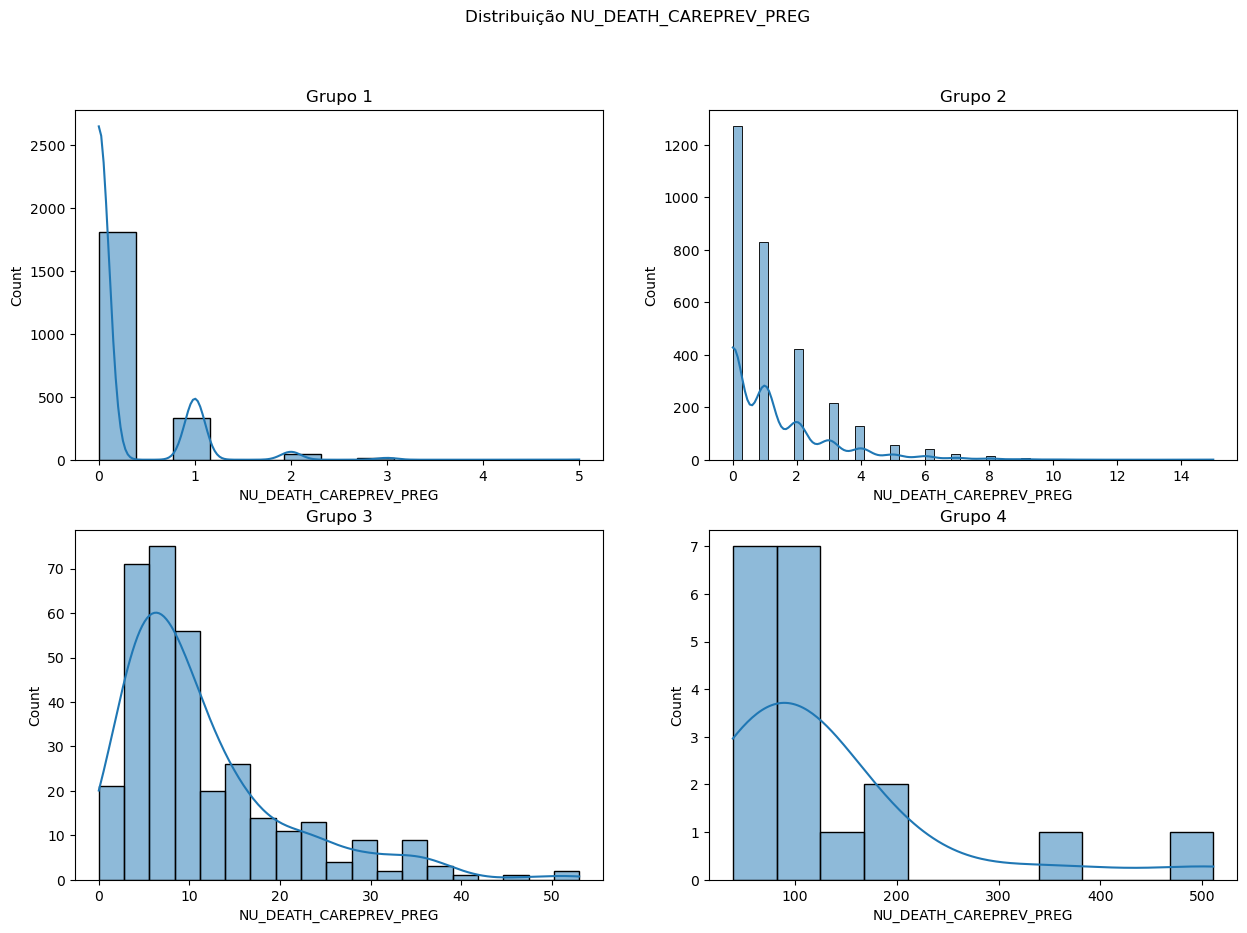

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

fig.suptitle('Distribuição NU_DEATH_CAREPREV_PREG')

sns.histplot(ax=axes[0, 0], data=grupo_1_2010, x="NU_DEATH_CAREPREV_PREG", kde=True)
axes[0, 0].set_title("Grupo 1")
sns.histplot(ax=axes[0, 1], data=grupo_2_2010, x="NU_DEATH_CAREPREV_PREG", kde=True)
axes[0, 1].set_title("Grupo 2")
sns.histplot(ax=axes[1, 0], data=grupo_3_2010, x="NU_DEATH_CAREPREV_PREG", kde=True)
axes[1, 0].set_title("Grupo 3")
sns.histplot(ax=axes[1, 1], data=grupo_4_2010, x="NU_DEATH_CAREPREV_PREG", kde=True)
axes[1, 1].set_title("Grupo 4")

In [52]:
df1 = grupo_1_2010[['LOCAL_CODE','LOCAL_NAME']]
df1['grupo'] = 1
df2 = grupo_2_2010[['LOCAL_CODE','LOCAL_NAME']]
df2['grupo'] = 2
df3 = grupo_3_2010[['LOCAL_CODE','LOCAL_NAME']]
df3['grupo'] = 3
df4 = grupo_4_2010[['LOCAL_CODE','LOCAL_NAME']]
df4['grupo'] = 4

/Users/jessica.souza2/miniforge3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jessica.souza2/miniforge3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/jessica.souza2/miniforge3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [53]:
df1

,LOCAL_CODE,LOCAL_NAME,grupo
66,110003,Cabixi,1
456,110026,Rio Crespo,1
740,110060,Cacaulândia,1
818,110090,Castanheiras,1
1023,110143,Nova União,1
...,...,...,...
143030,522180,Urutaí,1
143081,522190,Varjão,1
143133,522205,Vicentinópolis,1
143159,522220,Vila Boa,1


In [54]:
df5 = df1.append(df2, ignore_index=True)
df6 = df5.append(df3, ignore_index=True)
df7 = df6.append(df4, ignore_index=True)


In [55]:
df7

,LOCAL_CODE,LOCAL_NAME,grupo
0,110003,Cabixi,1
1,110026,Rio Crespo,1
2,110060,Cacaulândia,1
3,110090,Castanheiras,1
4,110143,Nova União,1
...,...,...,...
5560,355030,São Paulo,4
5561,410690,Curitiba,4
5562,431490,Porto Alegre,4
5563,520870,Goiânia,4


In [56]:
lista_new_cities

['Pescaria Brava',
 'Pinto Bandeira',
 'Paraíso das Águas',
 'Mojuí dos Campos',
 'Balneário Rincão']

In [57]:
df_new_1 = grupo_1_2021[grupo_1_2021['LOCAL_NAME'].isin(lista_new_cities)][['LOCAL_CODE','LOCAL_NAME']]
df_new_1['grupo'] = 1

In [58]:
df_new_2 = grupo_2_2021[grupo_2_2021['LOCAL_NAME'].isin(lista_new_cities)][['LOCAL_CODE','LOCAL_NAME']]
df_new_2['grupo'] = 2

In [59]:
df8 = df7.append(df_new_1, ignore_index=True)
df9 = df8.append(df_new_2, ignore_index=True)

In [61]:
estratificacao = df9.copy()

In [ ]:
#df9.to_csv('Cidades_estratificadas_por_grupo.txt')


In [ ]:
#df9.to_csv('Cidades_estratificadas_por_grupo.csv')


In [62]:
data_estratificado = data_clean.merge(estratificacao[['LOCAL_CODE','grupo']], on='LOCAL_CODE')

In [63]:
data_estratificado

,SCOPE,LOCAL_CODE,LOCAL_NAME,LOCAL_LATITUDE,LOCAL_LONGITUDE,YEAR,POPULATION,POPULATION_BIRTH,MHDI,MHDI_E,...,NU_DEATH_DTPREV,NU_DEATH_PROMOPREV,NU_DEATH_PNEUMONIA,MORTALITY_IID,MORTALITY_MALNUTRITION,MORTALITY_COVID19,MORTALITY_COVID19B,FL1_OUT,FL2_OUT,grupo
0,7,110001,Alta Floresta D'Oeste,-12.469670,-62.274475,1996,33471.0,778,0.329,0.112,...,2,1,0,1.285347,0.000000,0.000000,0.000000,0,0,2
1,7,110001,Alta Floresta D'Oeste,-12.469670,-62.274475,1997,25009.0,587,0.329,0.112,...,1,1,0,0.000000,1.703578,0.000000,0.000000,0,0,2
2,7,110001,Alta Floresta D'Oeste,-12.469670,-62.274475,1998,24793.0,591,0.329,0.112,...,3,2,2,3.384095,0.000000,0.000000,0.000000,0,0,2
3,7,110001,Alta Floresta D'Oeste,-12.469670,-62.274475,1999,25025.0,689,0.329,0.112,...,6,1,2,1.451379,0.000000,0.000000,0.000000,0,0,2
4,7,110001,Alta Floresta D'Oeste,-12.469670,-62.274475,2000,26533.0,617,0.483,0.262,...,2,0,0,0.000000,0.000000,0.000000,0.000000,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143893,8,530010,Brasília,-15.781198,-47.796833,2017,3039444.0,44568,0.824,0.742,...,12,22,2,0.134626,0.000000,0.000000,0.000000,0,0,4
143894,8,530010,Brasília,-15.781198,-47.796833,2018,2974703.0,44195,0.824,0.742,...,21,12,5,0.045254,0.000000,0.000000,0.000000,0,0,4
143895,8,530010,Brasília,-15.781198,-47.796833,2019,3015268.0,42422,0.824,0.742,...,18,11,4,0.023573,0.070718,0.000000,0.000000,0,0,4
143896,8,530010,Brasília,-15.781198,-47.796833,2020,3055149.0,39133,0.824,0.742,...,10,9,3,0.000000,0.025554,0.051108,0.127769,0,0,4


In [64]:
data_estratificado_grupo_4 = data_estratificado[data_estratificado.grupo==4]

In [65]:
data_estratificado_grupo_4

,SCOPE,LOCAL_CODE,LOCAL_NAME,LOCAL_LATITUDE,LOCAL_LONGITUDE,YEAR,POPULATION,POPULATION_BIRTH,MHDI,MHDI_E,...,NU_DEATH_DTPREV,NU_DEATH_PROMOPREV,NU_DEATH_PNEUMONIA,MORTALITY_IID,MORTALITY_MALNUTRITION,MORTALITY_COVID19,MORTALITY_COVID19B,FL1_OUT,FL2_OUT,grupo
82255,7,330170,Duque de Caxias,-22.632456,-43.299615,1996,715089.0,16747,0.506,0.320,...,82,43,39,1.731653,0.358273,0.000000,0.000000,0,0,4
82256,7,330170,Duque de Caxias,-22.632456,-43.299615,1997,726875.0,16791,0.506,0.320,...,57,33,31,1.131559,0.238223,0.000000,0.000000,0,0,4
82257,7,330170,Duque de Caxias,-22.632456,-43.299615,1998,736812.0,16345,0.506,0.320,...,59,20,27,0.795350,0.183542,0.000000,0.000000,0,0,4
82258,7,330170,Duque de Caxias,-22.632456,-43.299615,1999,746758.0,17150,0.506,0.320,...,44,19,28,0.641399,0.174927,0.000000,0.000000,0,0,4
82259,7,330170,Duque de Caxias,-22.632456,-43.299615,2000,775456.0,16498,0.601,0.458,...,49,19,21,0.424294,0.303067,0.000000,0.000000,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143893,8,530010,Brasília,-15.781198,-47.796833,2017,3039444.0,44568,0.824,0.742,...,12,22,2,0.134626,0.000000,0.000000,0.000000,0,0,4
143894,8,530010,Brasília,-15.781198,-47.796833,2018,2974703.0,44195,0.824,0.742,...,21,12,5,0.045254,0.000000,0.000000,0.000000,0,0,4
143895,8,530010,Brasília,-15.781198,-47.796833,2019,3015268.0,42422,0.824,0.742,...,18,11,4,0.023573,0.070718,0.000000,0.000000,0,0,4
143896,8,530010,Brasília,-15.781198,-47.796833,2020,3055149.0,39133,0.824,0.742,...,10,9,3,0.000000,0.025554,0.051108,0.127769,0,0,4


In [66]:
data_estratificado_grupo_4.columns

Index(['SCOPE', 'LOCAL_CODE', 'LOCAL_NAME', 'LOCAL_LATITUDE',
       'LOCAL_LONGITUDE', 'YEAR', 'POPULATION', 'POPULATION_BIRTH', 'MHDI',
       'MHDI_E', 'MHDI_L', 'MHDI_I', 'GINI', 'GDP', 'GDP_PC', 'SANITATION',
       'BIRTH_RATE', 'AGE', 'NU_DEATH_ALL', 'NU_DEATH_AVOIDABLE',
       'NU_DEATH_ILLDEFINED', 'NU_DEATH_OTHERS', 'NU_DEATH_IMMUNOPREV',
       'NU_DEATH_CAREPREV_ALL', 'NU_DEATH_CAREPREV_PREG',
       'NU_DEATH_CAREPREV_DELIV', 'NU_DEATH_CAREPREV_CHILD', 'NU_DEATH_DTPREV',
       'NU_DEATH_PROMOPREV', 'NU_DEATH_PNEUMONIA', 'MORTALITY_IID',
       'MORTALITY_MALNUTRITION', 'MORTALITY_COVID19', 'MORTALITY_COVID19B',
       'FL1_OUT', 'FL2_OUT', 'grupo'],
      dtype='object')

82255     1996
82256     1997
82257     1998
82258     1999
82259     2000
          ... 
143893    2017
143894    2018
143895    2019
143896    2020
143897    2021
Name: YEAR, Length: 494, dtype: int64

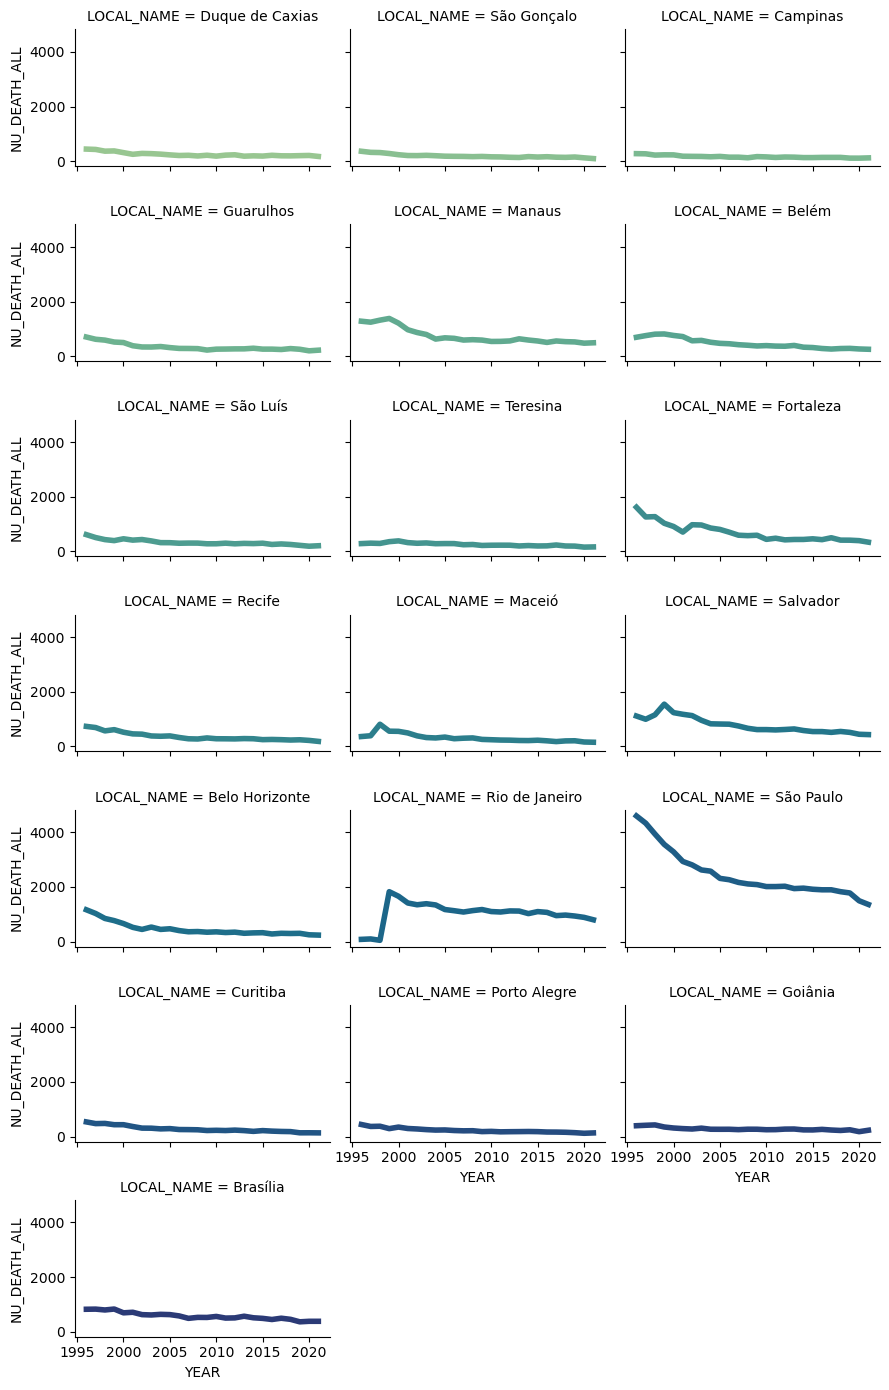

In [71]:
import seaborn as sns

# Plot each year's time series in its own facet
g = sns.relplot(
    data=data_estratificado_grupo_4,
    x="YEAR", y="NU_DEATH_ALL", col="LOCAL_NAME", hue="LOCAL_NAME",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)


In [73]:
data_estratificado_grupo_4[data_estratificado_grupo_4.LOCAL_NAME == 'Salvador']

,SCOPE,LOCAL_CODE,LOCAL_NAME,LOCAL_LATITUDE,LOCAL_LONGITUDE,YEAR,POPULATION,POPULATION_BIRTH,MHDI,MHDI_E,...,NU_DEATH_DTPREV,NU_DEATH_PROMOPREV,NU_DEATH_PNEUMONIA,MORTALITY_IID,MORTALITY_MALNUTRITION,MORTALITY_COVID19,MORTALITY_COVID19B,FL1_OUT,FL2_OUT,grupo
143586,8,292740,Salvador,-12.873486,-38.514744,1996,2211539.0,45557,0.563,0.383,...,148,144,66,2.260904,0.746318,0.000000,0.000000,0,0,4
143587,8,292740,Salvador,-12.873486,-38.514744,1997,2245522.0,47930,0.563,0.383,...,110,84,45,1.064052,0.459003,0.000000,0.000000,0,0,4
143588,8,292740,Salvador,-12.873486,-38.514744,1998,2274167.0,44958,0.563,0.383,...,141,109,76,1.668224,0.444860,0.000000,0.000000,0,0,4
143589,8,292740,Salvador,-12.873486,-38.514744,1999,2302832.0,46291,0.563,0.383,...,124,77,49,0.907304,0.302435,0.000000,0.000000,0,0,4
143590,8,292740,Salvador,-12.873486,-38.514744,2000,2443107.0,44976,0.654,0.525,...,110,58,59,0.800427,0.311277,0.000000,0.000000,0,0,4
143591,8,292740,Salvador,-12.873486,-38.514744,2001,2485702.0,43273,0.654,0.525,...,92,50,45,0.855037,0.138655,0.000000,0.000000,0,0,4
143592,8,292740,Salvador,-12.873486,-38.514744,2002,2520504.0,40344,0.654,0.525,...,73,47,34,0.520523,0.347016,0.000000,0.000000,0,0,4
143593,8,292740,Salvador,-12.873486,-38.514744,2003,2556429.0,39145,0.654,0.525,...,73,40,38,0.408737,0.332099,0.000000,0.000000,0,0,4
143594,8,292740,Salvador,-12.873486,-38.514744,2004,2631831.0,38227,0.654,0.525,...,63,39,38,0.470871,0.183117,0.000000,0.000000,0,0,4
143595,8,292740,Salvador,-12.873486,-38.514744,2005,2673560.0,37603,0.654,0.525,...,64,32,23,0.478685,0.212749,0.000000,0.000000,0,0,4


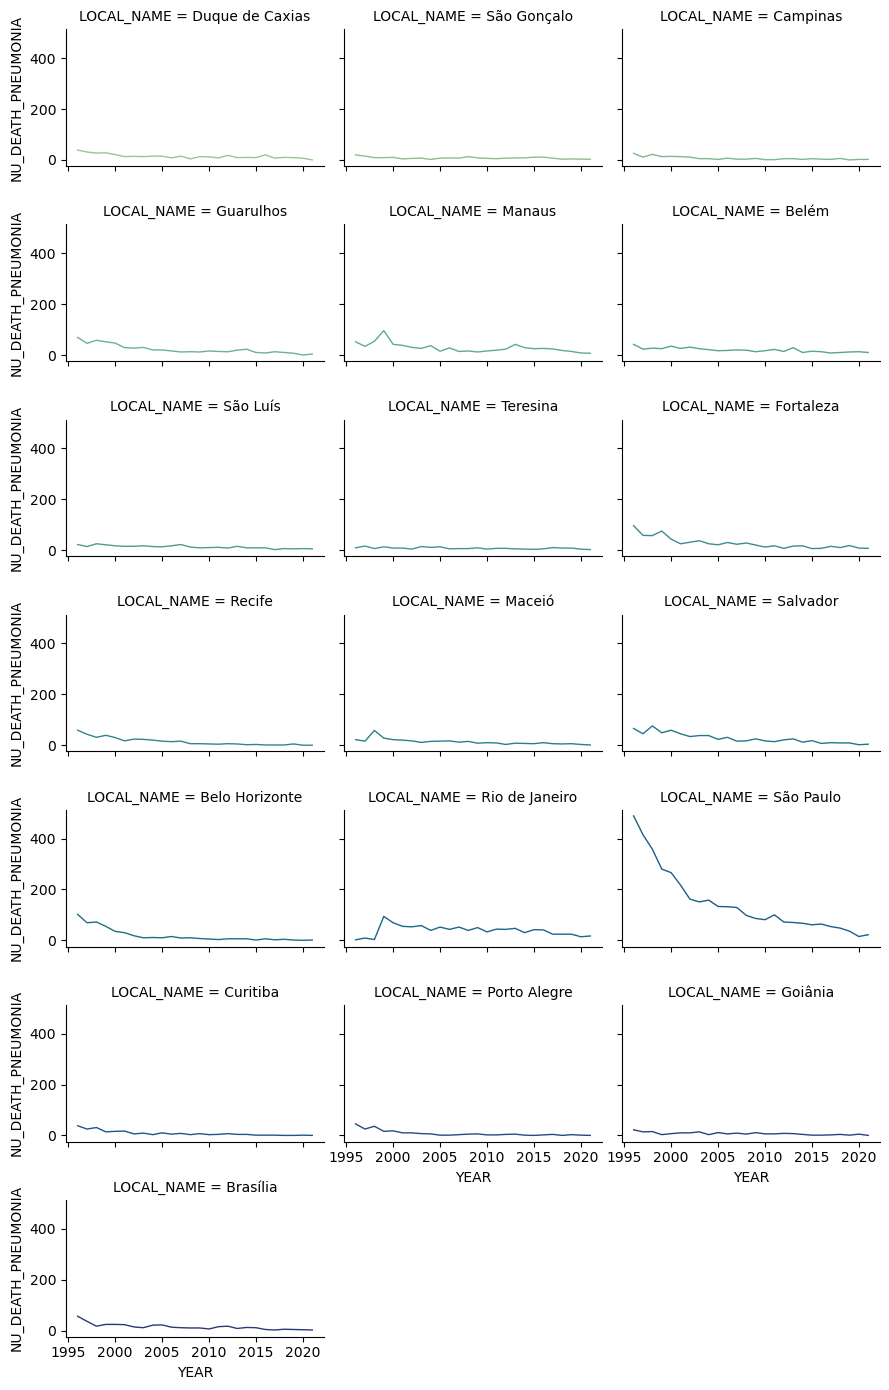

In [81]:
g = sns.relplot(
    data=data_estratificado_grupo_4,
    x="YEAR", y="NU_DEATH_PNEUMONIA", col="LOCAL_NAME", hue="LOCAL_NAME",
    kind="line", palette="crest", linewidth=1, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

In [85]:
data_filter = data_estratificado_grupo_4[data_estratificado_grupo_4.LOCAL_NAME=='Salvador']


In [86]:
data_filter

,SCOPE,LOCAL_CODE,LOCAL_NAME,LOCAL_LATITUDE,LOCAL_LONGITUDE,YEAR,POPULATION,POPULATION_BIRTH,MHDI,MHDI_E,...,NU_DEATH_DTPREV,NU_DEATH_PROMOPREV,NU_DEATH_PNEUMONIA,MORTALITY_IID,MORTALITY_MALNUTRITION,MORTALITY_COVID19,MORTALITY_COVID19B,FL1_OUT,FL2_OUT,grupo
143586,8,292740,Salvador,-12.873486,-38.514744,1996,2211539.0,45557,0.563,0.383,...,148,144,66,2.260904,0.746318,0.000000,0.000000,0,0,4
143587,8,292740,Salvador,-12.873486,-38.514744,1997,2245522.0,47930,0.563,0.383,...,110,84,45,1.064052,0.459003,0.000000,0.000000,0,0,4
143588,8,292740,Salvador,-12.873486,-38.514744,1998,2274167.0,44958,0.563,0.383,...,141,109,76,1.668224,0.444860,0.000000,0.000000,0,0,4
143589,8,292740,Salvador,-12.873486,-38.514744,1999,2302832.0,46291,0.563,0.383,...,124,77,49,0.907304,0.302435,0.000000,0.000000,0,0,4
143590,8,292740,Salvador,-12.873486,-38.514744,2000,2443107.0,44976,0.654,0.525,...,110,58,59,0.800427,0.311277,0.000000,0.000000,0,0,4
143591,8,292740,Salvador,-12.873486,-38.514744,2001,2485702.0,43273,0.654,0.525,...,92,50,45,0.855037,0.138655,0.000000,0.000000,0,0,4
143592,8,292740,Salvador,-12.873486,-38.514744,2002,2520504.0,40344,0.654,0.525,...,73,47,34,0.520523,0.347016,0.000000,0.000000,0,0,4
143593,8,292740,Salvador,-12.873486,-38.514744,2003,2556429.0,39145,0.654,0.525,...,73,40,38,0.408737,0.332099,0.000000,0.000000,0,0,4
143594,8,292740,Salvador,-12.873486,-38.514744,2004,2631831.0,38227,0.654,0.525,...,63,39,38,0.470871,0.183117,0.000000,0.000000,0,0,4
143595,8,292740,Salvador,-12.873486,-38.514744,2005,2673560.0,37603,0.654,0.525,...,64,32,23,0.478685,0.212749,0.000000,0.000000,0,0,4


/Users/jessica.souza2/miniforge3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  after removing the cwd from sys.path.


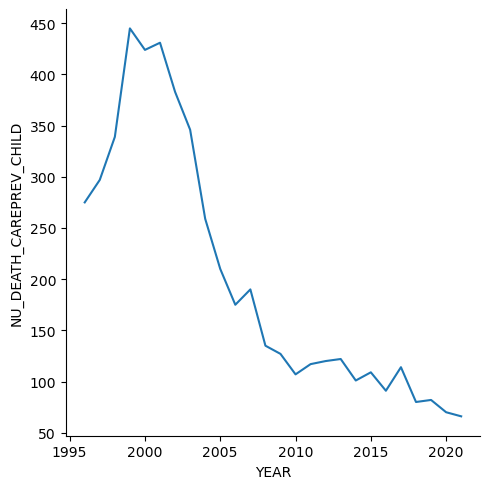

In [88]:
g = sns.relplot(
    data=data_filter,
    x="YEAR", y="NU_DEATH_CAREPREV_CHILD", 
    kind="line", palette="crest"
)

In [89]:
data_filter[["YEAR","NU_DEATH_CAREPREV_CHILD"]]

,YEAR,NU_DEATH_CAREPREV_CHILD
143586,1996,275
143587,1997,297
143588,1998,339
143589,1999,445
143590,2000,424
143591,2001,431
143592,2002,383
143593,2003,346
143594,2004,259
143595,2005,210
